# <a href="https://thetahat.ru/courses/bm-hf-2025-spr" target="_top" >Математическая статистика (ФБМФ, ФМХФ)</a>

## Семинар 2

**Комментарий** по домашнему заданию:


1.   **Внимательно читайте правила**, указанные в начале ноутбука;
2.   ДЗ отправлять только в **исходных** ноутбуках. Порядок задач в ноутбуке менять **запрещено**;
3.   **Запрещено** удалять существующие ячейки в ноутбуке, но можно добавлять новые, если иное не сказано явно;
4.   Внимательно читайте условия и названия переменных;
5.   Задания отправляются только боту. Для заданий частей А и Б есть **соответствующие** кнопки в боте. Часть А: сдаете 1 ноутбук, часть Б: сдаете 1 ноутбук;
6.   После отправки файла дождитесь ответа бота, что файл успешно загружен;
7.   В части Б подразумеваются **комментарии** к доказательствам (указание на независимость, линейность и т.п., обоснование применения тех или иных законов (ЗБЧ, ЦПТ)), **выводы** текстом;
8.   **До дедлайна** можно переотправлять ноутбуки соответствующих им частей ДЗ, файл автоматически **перезапишется**;
9.   Вопросы по заданиям можно будет задавать в таблице на сайте.

In [28]:
import numpy as np # работа с массивами
import scipy.stats as sps # работа со случайными величинами
import matplotlib.pyplot as plt # построение графиков
import seaborn as sns # построение графиков (зачастую более эстетичные графики)

## **Задача 1.**
Сгенерировать выборку размера 10 из распределения $\mathcal{N}(5, 2^2)$.


### Решение:

Объект `sps.norm` реализует нормальное распределение, ему передаются параметры распределения. Его метод `rvs` позволяет сгенерировать выборку заданного размера.

In [2]:
sps.norm(loc=5, scale=2).rvs(size=10)

array([ 3.86376048,  6.7463556 ,  6.70728156,  3.94379535,  5.93611136,
        7.40232526,  6.38352815, -0.36741993,  1.74065335,  3.35590057])

**Комментарий**: параметры распределения можно узнавать с помощью методов объекта

In [3]:
print('мат.ожидание =', sps.norm(loc=5, scale=2).mean())

мат.ожидание = 5.0


In [4]:
print(f'дисперсия = {sps.norm(loc=5, scale=2).var()}',
      f'стандартное отклонение = {sps.norm(loc=5, scale=2).std()}',
      sep='\n\n')

дисперсия = 4.0

стандартное отклонение = 2.0


Построим функцию распределения:

In [5]:
# задаем параметр среднего a и стандартного отклонения sigma
a = 5
sigma = 2

# создаем объект распределения с нужными параметрами
distribution = sps.norm(loc=a, scale=sigma)

In [6]:
# задаем сетку отображения функции распределения, x in [-2, 12]
grid_dist = np.linspace(-2, 12, 100)

# выводим последние 10 значений функции распределения F(x)
distribution.cdf(grid_dist)[-10:]

array([0.99790596, 0.99832873, 0.99867232, 0.99895016, 0.99917371,
       0.99935269, 0.99949527, 0.99960829, 0.99969742, 0.99976737])

Отрисуем график функции распределения:

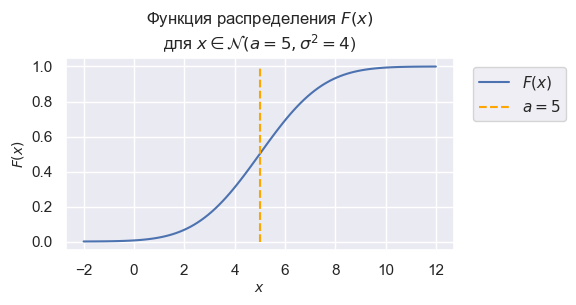

In [30]:
sns.set(style='darkgrid')  # Устанавливаем стиль

plt.figure(figsize=(5, 2.5), dpi=100)  # размер и разрешение
plt.title(
    'Функция распределения $F(x)$\nдля $x \in \\mathcal{N}'
    f'(a={a}, \sigma^2={sigma**2}$)'
) # заголовок с использованием спец.символов (и формул)
plt.plot(grid_dist, distribution.cdf(grid_dist), label='$F(x)$') # отрисовка линии F(x)
plt.vlines(x=a, ymin=0, ymax=1, linestyles='dashed', colors='orange', label=f'$a={a}$') # среднее
# plt.grid() # cетка, если не используете seaborn
plt.xlabel('$x$', fontsize=10) # подписи осей
plt.ylabel('$F(x)$', fontsize=10)
plt.legend(bbox_to_anchor=(1.03, 0.99)) # позиция легенды
plt.show()

И соответствующую плотность распределения:

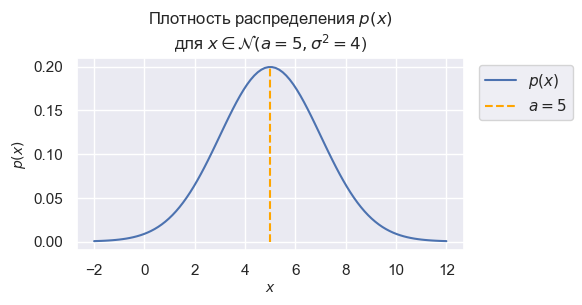

In [35]:
sns.set(style='darkgrid')  # Устанавливаем стиль

plt.figure(figsize=(5, 2.5), dpi=100)  # размер и разрешение
plt.title(
    'Плотность распределения $р(x)$\nдля $x \in \\mathcal{N}'
    f'(a={a}, \sigma^2={sigma**2}$)'
) # заголовок с использованием спец.символов (и формул)
plt.plot(grid_dist, distribution.pdf(grid_dist), label='$p(x)$')  # отрисовка линии p(x)
plt.vlines(x=a, ymin=0, ymax=.2, linestyles='dashed', colors='orange', label=f'$a={a}$') # среднее
# plt.grid() # cетка, если не используете seaborn
plt.xlabel('$x$', fontsize=10) # подписи осей
plt.ylabel('$р(x)$', fontsize=10)
plt.legend(bbox_to_anchor=(1.3, 1)) # позиция легенды
plt.show()

**Примечание:** у графиков *обязательно* должны быть:

*   заголовок,
*   подписи осей,
*   легенда (при необходимости).



## **Задача 2.**
Для каждого $\theta \in [0, 10]$ с шагом 0.1 сгенерировать выборку размера 20 из распределения $\mathcal{N}(\theta, 1)$. Иначе говоря,

* Первая выборка: $X_{1,1}, ..., X_{1,20} \sim \mathcal{N}(0, 1)$;
* Вторая выборка: $X_{2,1}, ..., X_{2,20} \sim \mathcal{N}(0.1, 1)$;
* ...
* 101-ая выборка: $X_{101,1}, ..., X_{101,20} \sim \mathcal{N}(10, 1)$.


### Решение:

Определим сетку параметров и представим ее в виде вектора-столбца:

In [9]:
grid = np.linspace(0, 10, 101)  # определение набора значений параметра
grid = grid.reshape((-1, 1))  # преобразование массива размера (N,) в размер (N, 1)
grid

array([[ 0. ],
       [ 0.1],
       [ 0.2],
       [ 0.3],
       [ 0.4],
       [ 0.5],
       [ 0.6],
       [ 0.7],
       [ 0.8],
       [ 0.9],
       [ 1. ],
       [ 1.1],
       [ 1.2],
       [ 1.3],
       [ 1.4],
       [ 1.5],
       [ 1.6],
       [ 1.7],
       [ 1.8],
       [ 1.9],
       [ 2. ],
       [ 2.1],
       [ 2.2],
       [ 2.3],
       [ 2.4],
       [ 2.5],
       [ 2.6],
       [ 2.7],
       [ 2.8],
       [ 2.9],
       [ 3. ],
       [ 3.1],
       [ 3.2],
       [ 3.3],
       [ 3.4],
       [ 3.5],
       [ 3.6],
       [ 3.7],
       [ 3.8],
       [ 3.9],
       [ 4. ],
       [ 4.1],
       [ 4.2],
       [ 4.3],
       [ 4.4],
       [ 4.5],
       [ 4.6],
       [ 4.7],
       [ 4.8],
       [ 4.9],
       [ 5. ],
       [ 5.1],
       [ 5.2],
       [ 5.3],
       [ 5.4],
       [ 5.5],
       [ 5.6],
       [ 5.7],
       [ 5.8],
       [ 5.9],
       [ 6. ],
       [ 6.1],
       [ 6.2],
       [ 6.3],
       [ 6.4],
       [ 6.5],
       [ 6

Теперь можем сгенерировать все выборки сразу. Для этого передадим наш вектор-столбец значений параметра (размера `(101, 1)`) в класс нормального распределения и установим размер выборки как `(101, 20)`.

Функция в таком случае дополнит вектор-столбец параметров до матрицы размера `(101, 20)` копированием вектора 20 раз и сгенерирует случайную матрицу размера `(101, 20)` в соответствии с полученной матрицей параметров.

In [10]:
samples = sps.norm(loc=grid).rvs(size=(101, 20))
samples.shape  # размер матрицы

(101, 20)

Посмотрим на саму матрицу. Напомним, что **строки матрицы** образуют **выборки**, которые мы и хотели получить.

In [11]:
samples

array([[-0.55562893, -0.43209561, -1.10787241, ..., -0.11375535,
        -1.48422707,  0.98731226],
       [ 0.25501698, -0.7198652 , -2.17065981, ...,  0.46674149,
         0.11031938, -1.28218317],
       [-0.91736889,  1.17651688,  1.20253068, ...,  0.60433665,
        -0.11679373,  0.23162225],
       ...,
       [ 7.72069602, 11.01546572,  9.22322359, ...,  9.04172239,
        11.14645834,  8.68117401],
       [10.15225958, 10.30698595,  9.74916931, ...,  8.69930405,
        11.07288012,  9.75911825],
       [ 8.48567214, 11.75037264,  9.85095451, ..., 10.61165163,
         8.94605823, 11.59521831]])

Первая выборка:

In [12]:
samples[0]

array([-0.55562893, -0.43209561, -1.10787241,  1.67521153, -1.06019654,
       -1.65285378, -1.98300203, -1.40965618, -0.33027515,  1.58970035,
       -1.08361494, -0.27738991,  0.47646386, -0.41732711, -0.05345771,
        1.47846405, -0.80792169, -0.11375535, -1.48422707,  0.98731226])

Первые элементы всех выборок:

In [13]:
samples[:, 0]

array([-0.55562893,  0.25501698, -0.91736889, -1.34702469,  2.03682301,
        0.65003298,  1.56004619, -0.20011361,  1.47942999,  1.08669411,
       -0.09083459,  0.03590037,  1.04662826,  1.20286721,  1.59512068,
        2.25681671,  0.34443816,  1.14039951,  1.8542447 ,  3.06754822,
        2.84936859,  2.32204115,  2.19154596,  1.89855873,  1.17496546,
        2.11112757,  0.87972387,  1.91123159,  5.50421103,  3.15228616,
        1.42917442,  1.60423198,  3.74977881,  3.69702703,  3.54066795,
        2.71427287,  3.60852145,  4.02662094,  3.62140139,  2.65187176,
        4.17554455,  4.00711593,  5.10236773,  3.03231839,  5.10672476,
        3.84320131,  4.70717332,  3.52646708,  4.32877294,  4.6247095 ,
        4.14436419,  5.01091342,  6.99109222,  4.58130053,  4.34728947,
        5.49249509,  5.88996833,  3.75746711,  6.69326665,  8.71553918,
        6.3765486 ,  6.28310157,  5.4037817 ,  5.78580407,  5.41834682,
        5.56071465,  7.00245675,  6.55697019,  5.43468967,  7.76

## **Задача 3.**
Произвести некоторые арифметические операции с матрицами.

## Решение:
Арифметические операции над векторами и матрицами типа `np.array` можно производить сразу по всем элементам. 


Например, если требуется домножить каждый элемент матрицы на 2, можно написать так:

In [14]:
2 * samples

array([[-1.11125787, -0.86419123, -2.21574481, ..., -0.22751069,
        -2.96845414,  1.97462452],
       [ 0.51003396, -1.43973039, -4.34131962, ...,  0.93348299,
         0.22063875, -2.56436633],
       [-1.83473778,  2.35303376,  2.40506136, ...,  1.20867331,
        -0.23358746,  0.46324449],
       ...,
       [15.44139205, 22.03093144, 18.44644718, ..., 18.08344478,
        22.29291667, 17.36234801],
       [20.30451915, 20.6139719 , 19.49833862, ..., 17.3986081 ,
        22.14576024, 19.51823649],
       [16.97134427, 23.50074528, 19.70190903, ..., 21.22330327,
        17.89211647, 23.19043663]])

Для возведения в экспоненту всех элементов матрицы можно воспользоваться функцией `np.exp`. Подобные функции есть для многих арифметических операций.

In [15]:
np.exp(samples)

array([[5.73711322e-01, 6.49147306e-01, 3.30260875e-01, ...,
        8.92476277e-01, 2.26677479e-01, 2.68401084e+00],
       [1.29048353e+00, 4.86817876e-01, 1.14102306e-01, ...,
        1.59478909e+00, 1.11663464e+00, 2.77430961e-01],
       [3.99568968e-01, 3.24305854e+00, 3.32852972e+00, ...,
        1.83003786e+00, 8.89768705e-01, 1.26064343e+00],
       ...,
       [2.25452824e+03, 6.08073361e+04, 1.01296656e+04, ...,
        8.44831582e+03, 6.93178922e+04, 5.89095855e+03],
       [2.56489926e+04, 2.99410566e+04, 1.71399848e+04, ...,
        5.99873593e+03, 6.44007217e+04, 1.73113606e+04],
       [4.84485277e+03, 1.26800802e+05, 1.89764595e+04, ...,
        4.06052088e+04, 7.67756896e+03, 1.08577373e+05]])

Транспонирование матриц и матричное умножение:

In [16]:
samples @ samples.T

array([[ 2.46251969e+01, -3.67561365e+00, -4.66396000e+00, ...,
        -5.84720060e+01, -6.58223062e+01, -6.44853938e+01],
       [-3.67561365e+00,  1.67881824e+01, -5.87340880e-01, ...,
         3.26948477e+01,  3.09909790e+01,  3.45455798e+01],
       [-4.66396000e+00, -5.87340880e-01,  1.30060610e+01, ...,
         7.33379018e+01,  7.10083658e+01,  7.76780170e+01],
       ...,
       [-5.84720060e+01,  3.26948477e+01,  7.33379018e+01, ...,
         1.79764133e+03,  1.86510231e+03,  1.98526803e+03],
       [-6.58223062e+01,  3.09909790e+01,  7.10083658e+01, ...,
         1.86510231e+03,  1.96733542e+03,  2.07775638e+03],
       [-6.44853938e+01,  3.45455798e+01,  7.76780170e+01, ...,
         1.98526803e+03,  2.07775638e+03,  2.23083131e+03]])

## **Задача 4.**

Нарисовать графики зависимости выборочного среднего 
* от параметра;
* от номера наблюдения для каждого параметра.

## Решение:

Для начала по каждой выборке посчитаем среднее.

Это можно сделать функцией `np.mean`, указав параметр `axis`. У элементов матрицы два индекса, нам нужно произвести усреднение по второму индексу, нетрогая первый. Поскольку в Питоне нумерация с нуля, усреднение по второму индексу задается как `axis=1`.

In [17]:
means = np.mean(samples, axis=1)
means.shape

(101,)

Построение графика:

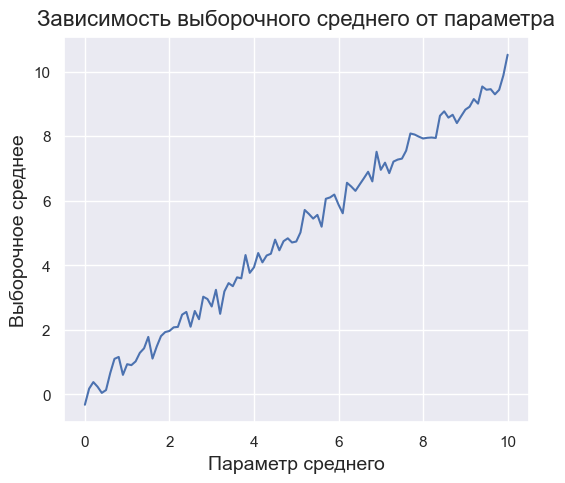

In [37]:
sns.set(style='darkgrid')  # Устанавливаем стиль

plt.figure(figsize=(6, 5))
plt.plot(grid, means)
plt.xlabel('Параметр среднего', fontsize=14)
plt.ylabel('Выборочное среднее', fontsize=14)
plt.title('Зависимость выборочного среднего от параметра',
          y=1.01, fontsize=16); # положение заголовка и размер шрифта

Для вычисления выборочного среднего в засимости от размера выборки, нужно воспользоваться функцией `np.cumsum`. При передачи ей нашей матрицы и указания `axis=1` эта функция вернет матрицу, в которой
* первый столбец равен первому столбцу исходной матрицы;
* второй столбец равен сумме первых двух столбцов исходной матрицы;
* третий столбец равен сумме первых трех столбцов исходной матрицы;
* ...
* последний столбец равен сумме всех столбцов исходной матрицы.

Поскольку мы хотим посчитать средние, поделим поэлементно на количество столбцов, которые мы просуммировали.

In [19]:
cumulative_means = np.cumsum(samples, axis=1) / np.arange(1, 21)
cumulative_means.shape

(101, 20)

Визуализация результата:

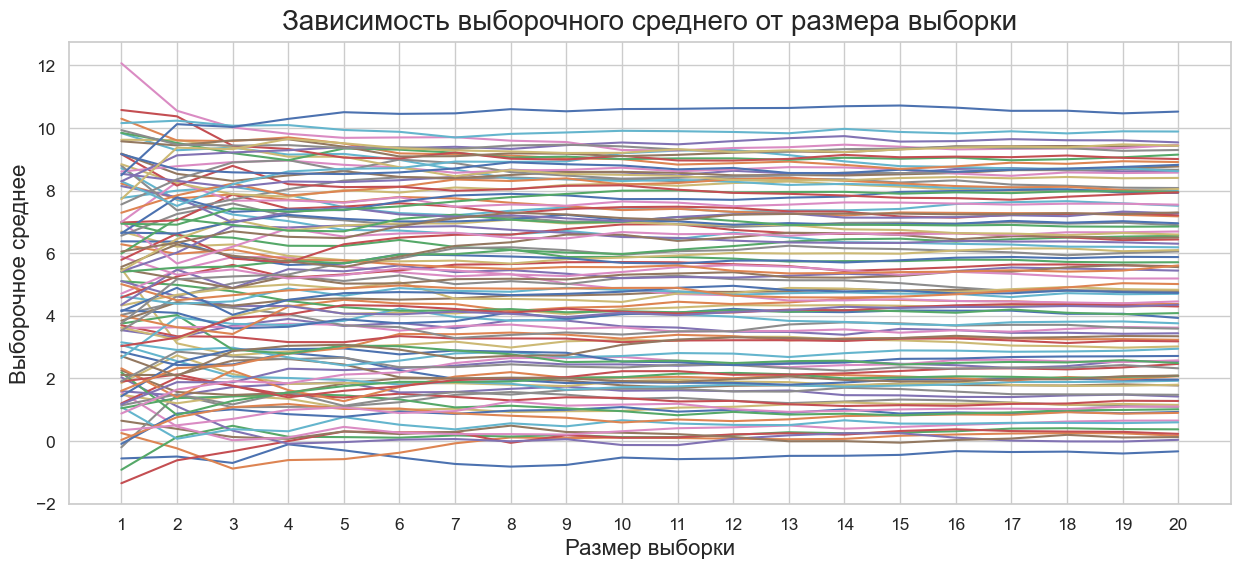

In [39]:
sns.set(style='whitegrid')  # Устанавливаем стиль

plt.figure(figsize=(15, 6))
for i in range(101):
    plt.plot(np.arange(1, 21), cumulative_means[i])

plt.title('Зависимость выборочного среднего от размера выборки',
          y=1.01, fontsize=20);
plt.xlabel('Размер выборки', fontsize=16)
plt.ylabel('Выборочное среднее', fontsize=16)
plt.xticks(range(1, 21)) # подписи Ох
plt.tick_params(axis='both', which='major', labelsize=12.5)
plt.show()